## Investigation On Intervals and Determine whether it's meal

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import numpy as np
import intervals as invs
import warnings

export_root = '../WT_export/Figure 3/Supplementary 3'
os.makedirs(export_root, exist_ok=True)
warnings.filterwarnings('ignore')
alpha = 0.1
import meals as ml
import tools as tl
import intervals as invs
from accuracy import graph_group_stats
from preprocessing import preprocess_csv

## Control Group

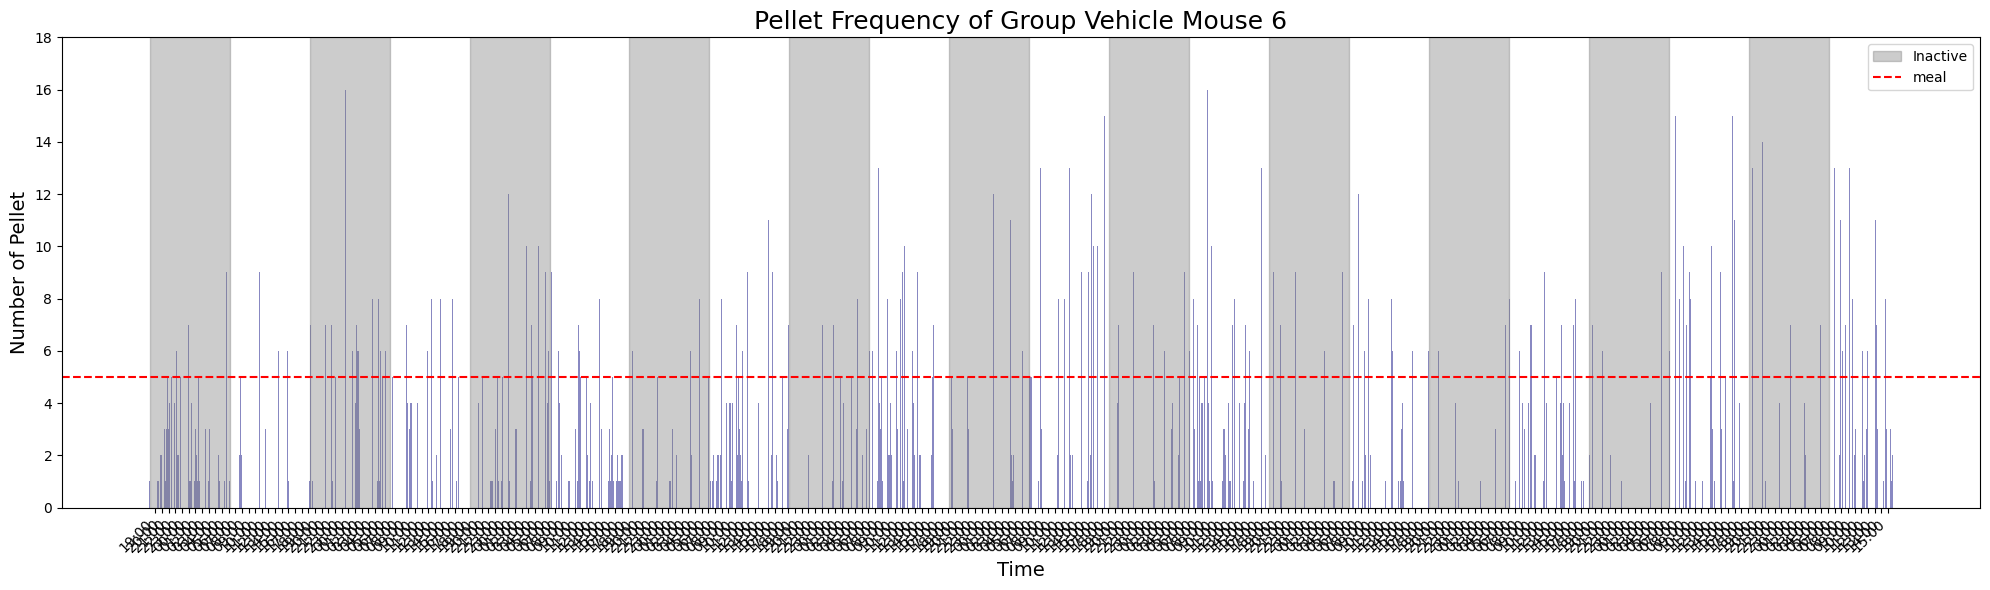

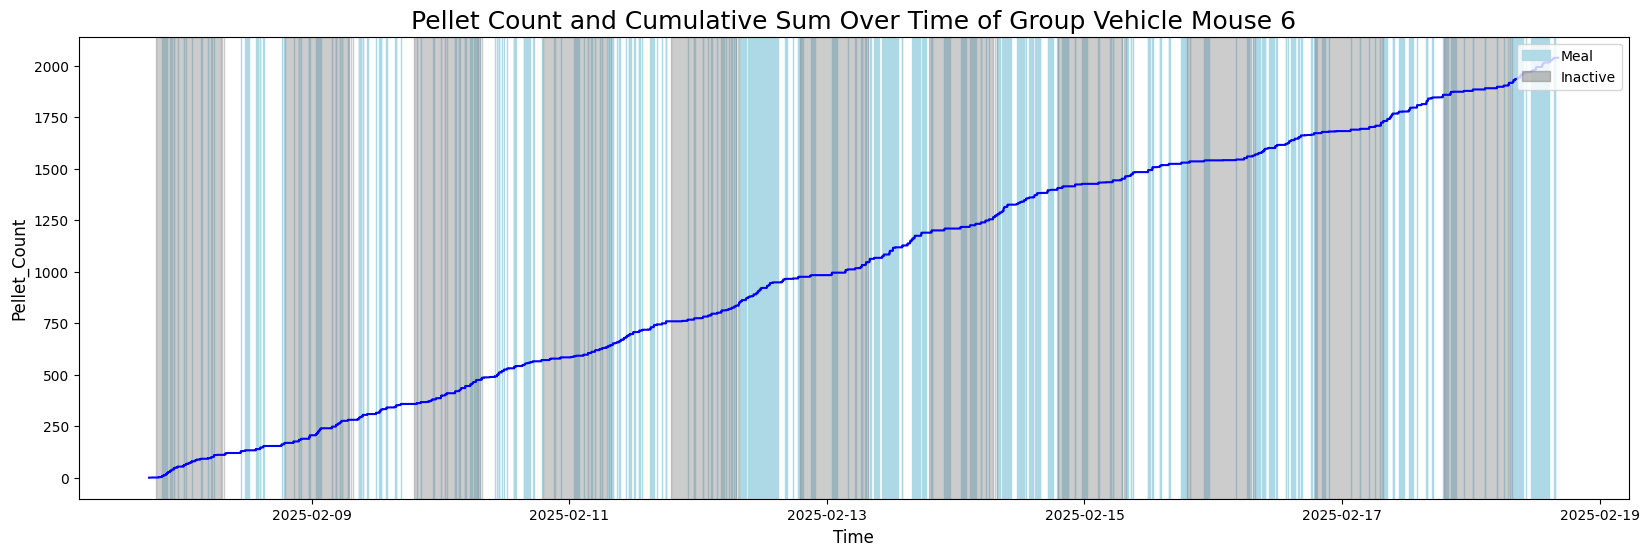

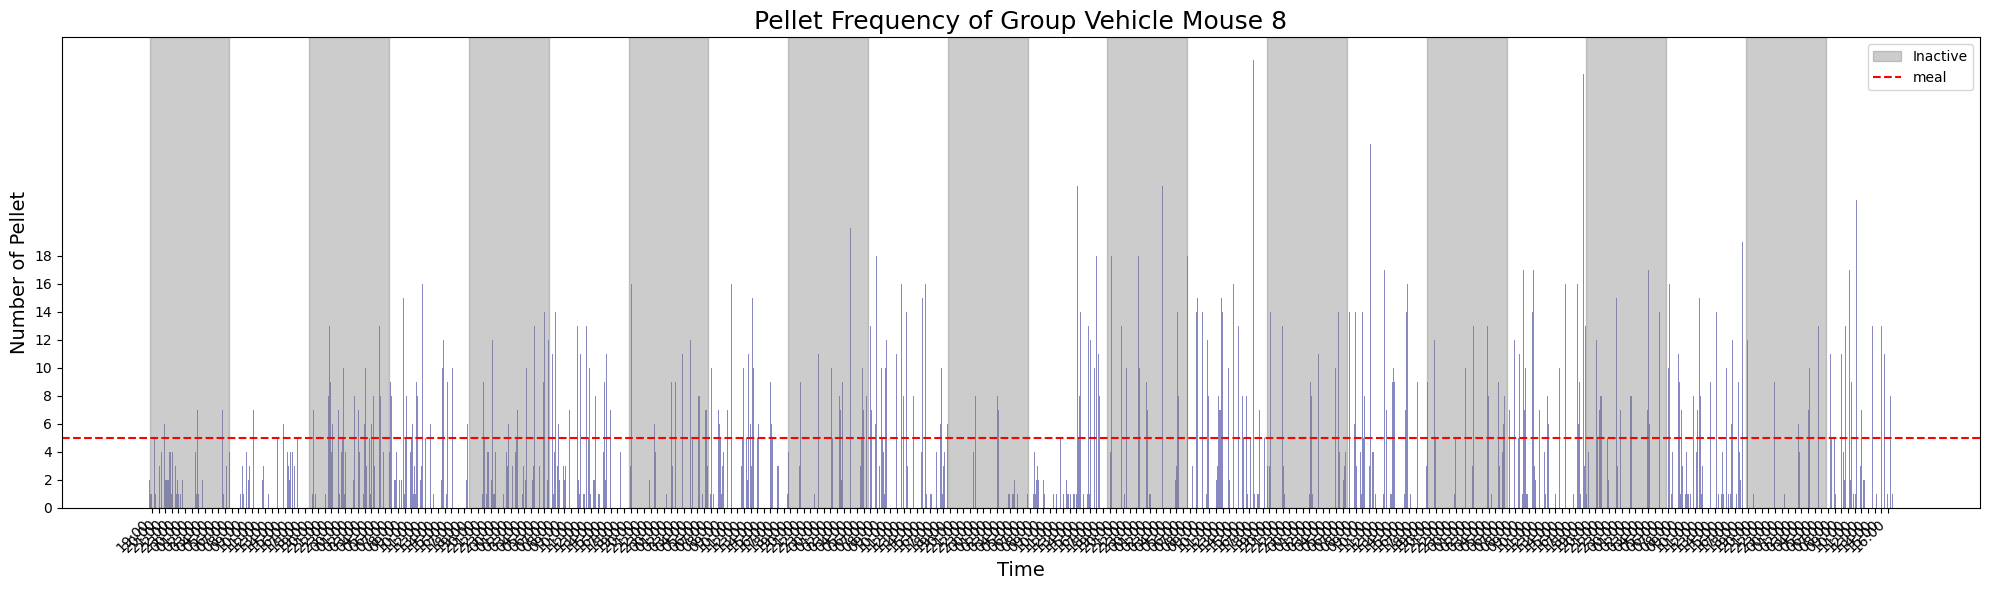

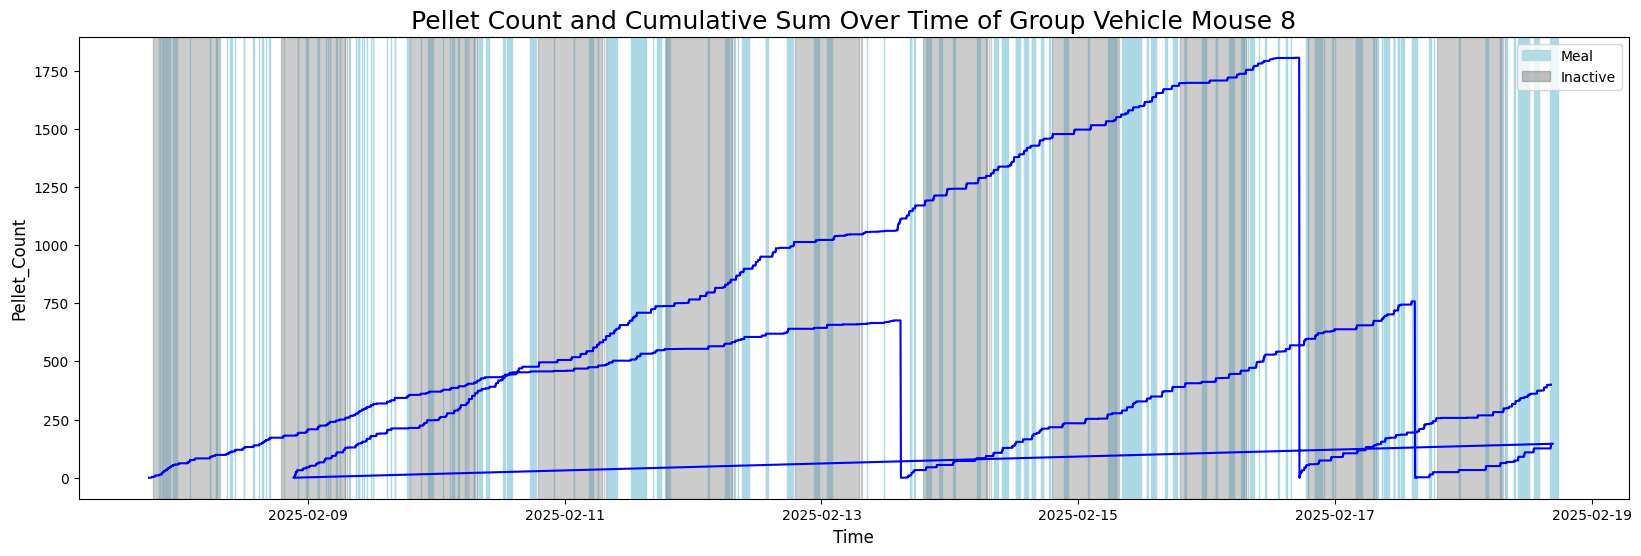

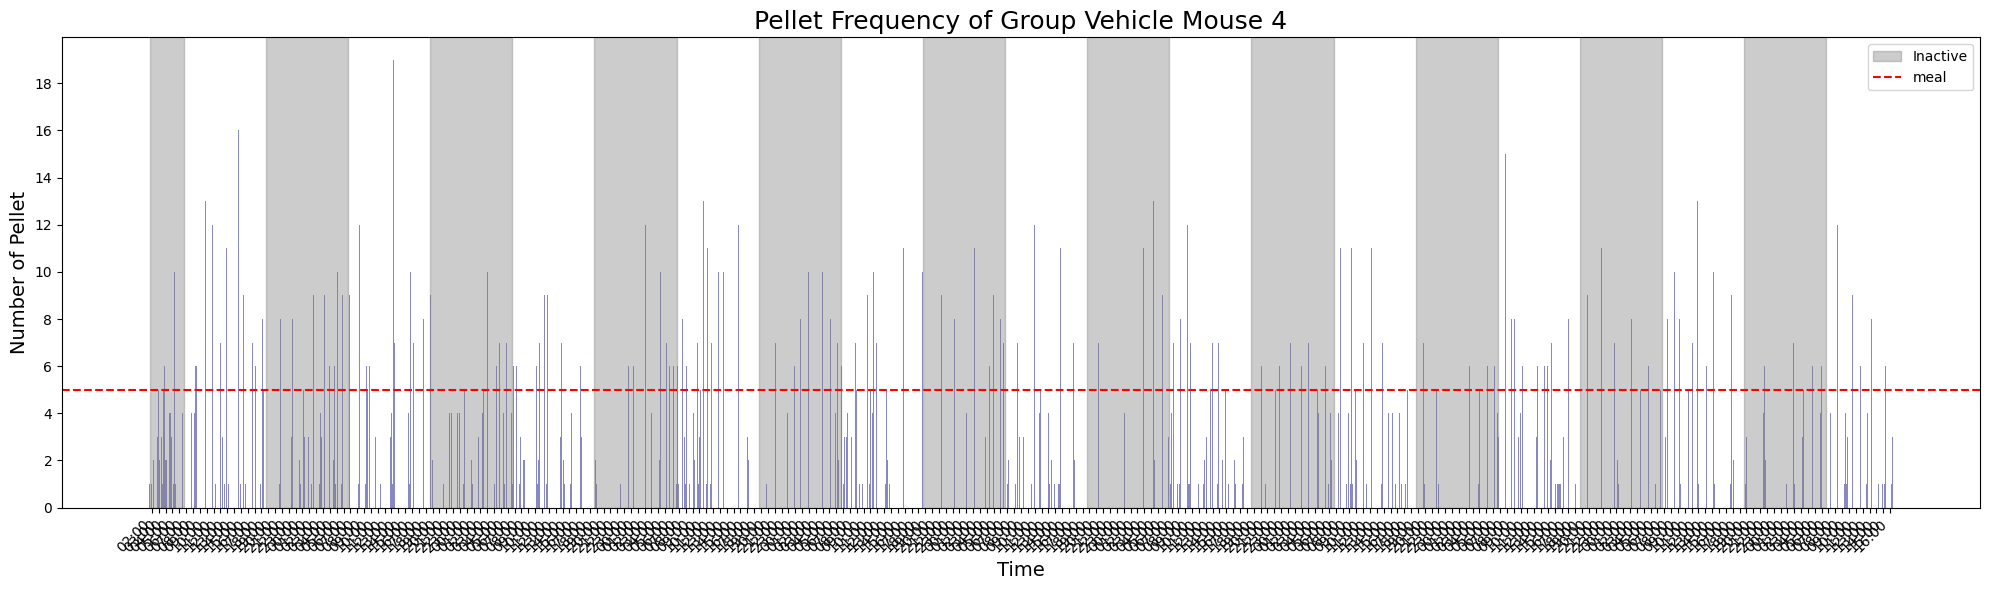

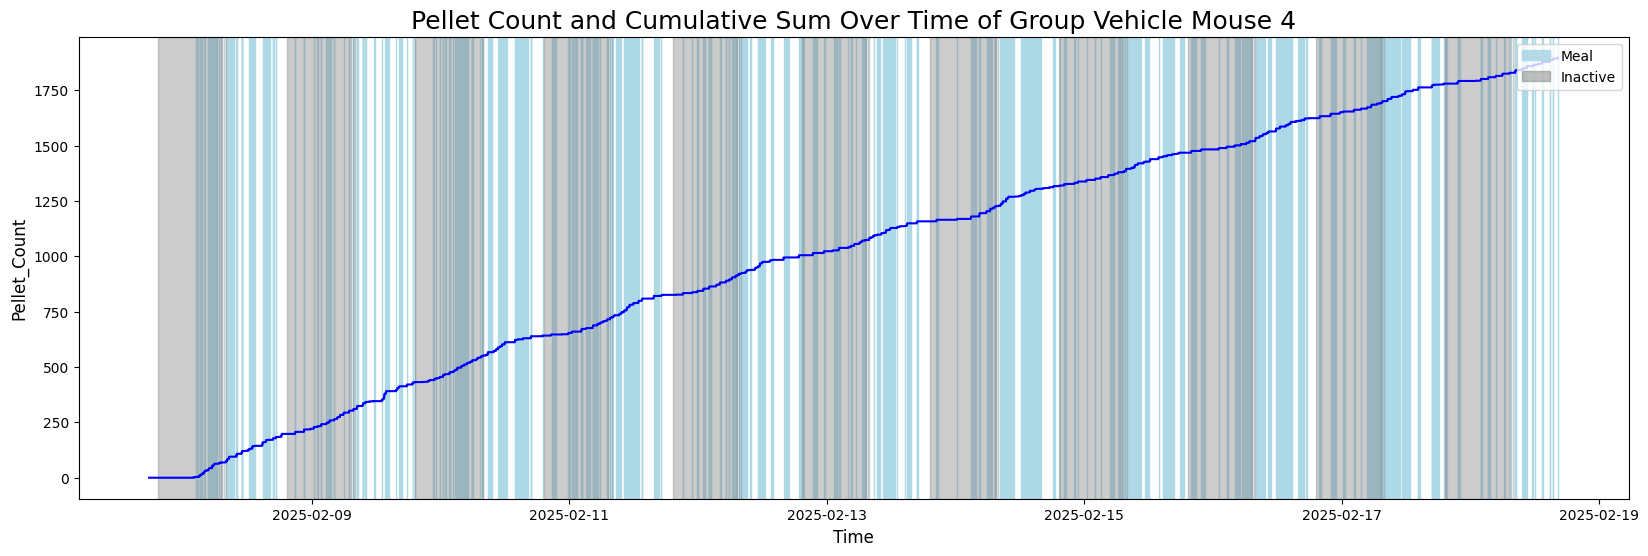

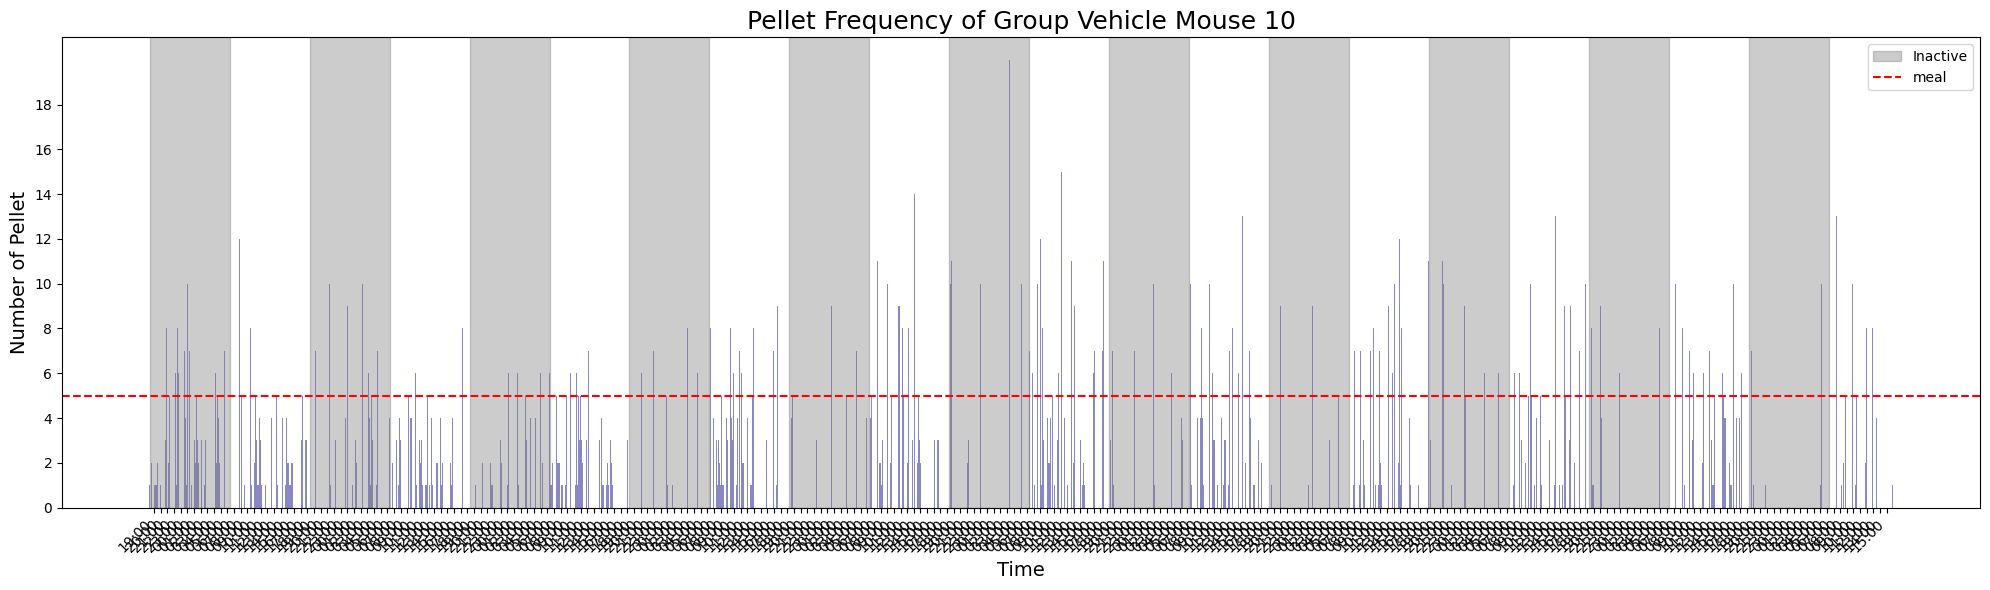

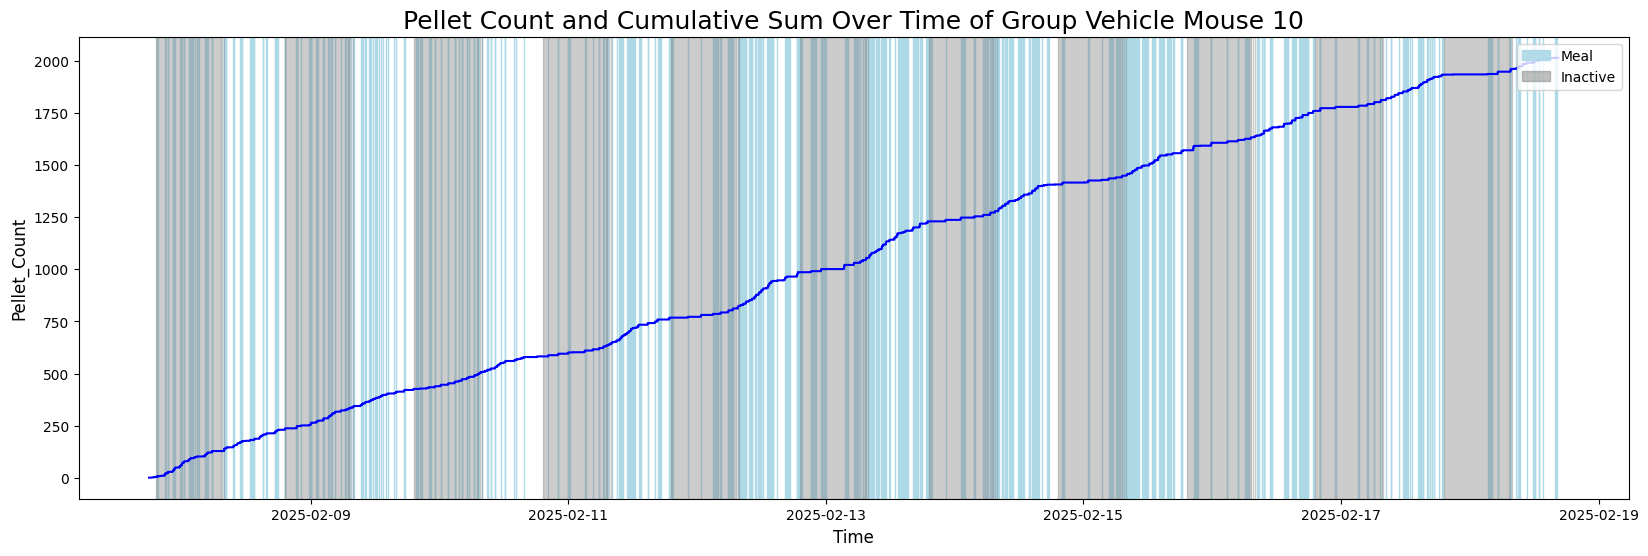

Error when reading M2_sal.CSV: time data "7/0/2093 1:37:00" doesn't match format "%m/%d/%Y %H:%M:%S", at position 2205. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [2]:
veh_pellet = [] # pellet per hour
veh_dark_meals = [] # percentage of meals in inactive/dark phase
veh_fir_meal = []
veh_fir_good_meal = []
flip_veh_meal_count = []

for file in os.listdir('../Food Intake Data/'):
    # print(file)
    if 'fen' in file: continue
    try:
        data = preprocess_csv(os.path.join('../Food Intake Data/', file))
    except Exception as e:
        print(f'Error when reading {file}: {e}')        
        continue
    veh_pellet.append(ml.get_daily_pellet_counts(data))
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = 'Vehicle', file.split('_')[0][1:]
    flip_veh_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    veh_dark_meals.append(ml.active_meal(meal))
    veh_fir_meal.append(meal_1)
    veh_fir_good_meal.append(meal_1_good)
    # ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, f'pellet_freq_{bhv}_{num}'))
    # ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, f'pellet_curve_{sheet}.svg'))
    ml.graph_pellet_frequency(group, bhv, num,)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, )

## Fentenyl Group

M5_fen.CSV


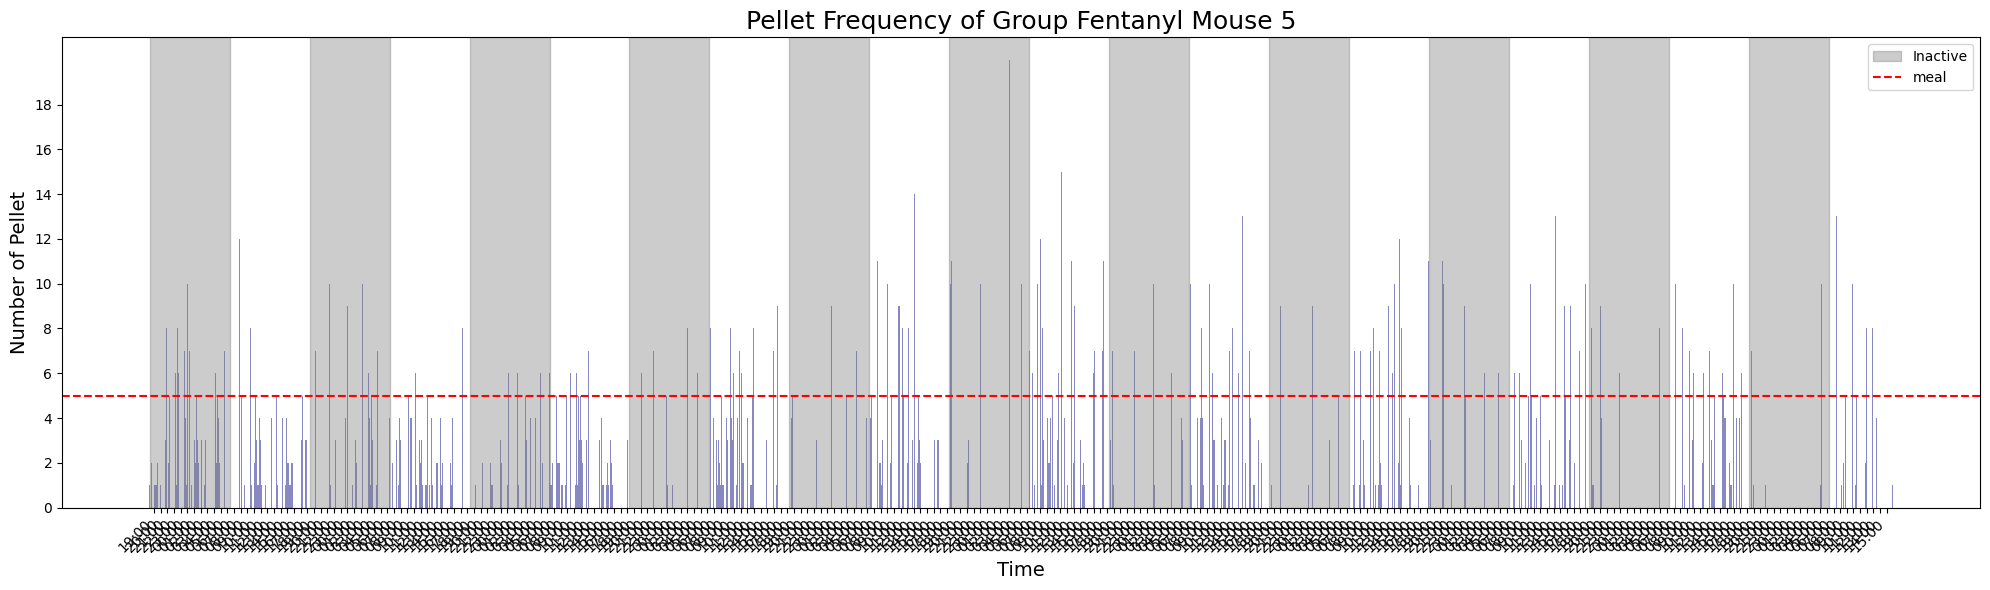

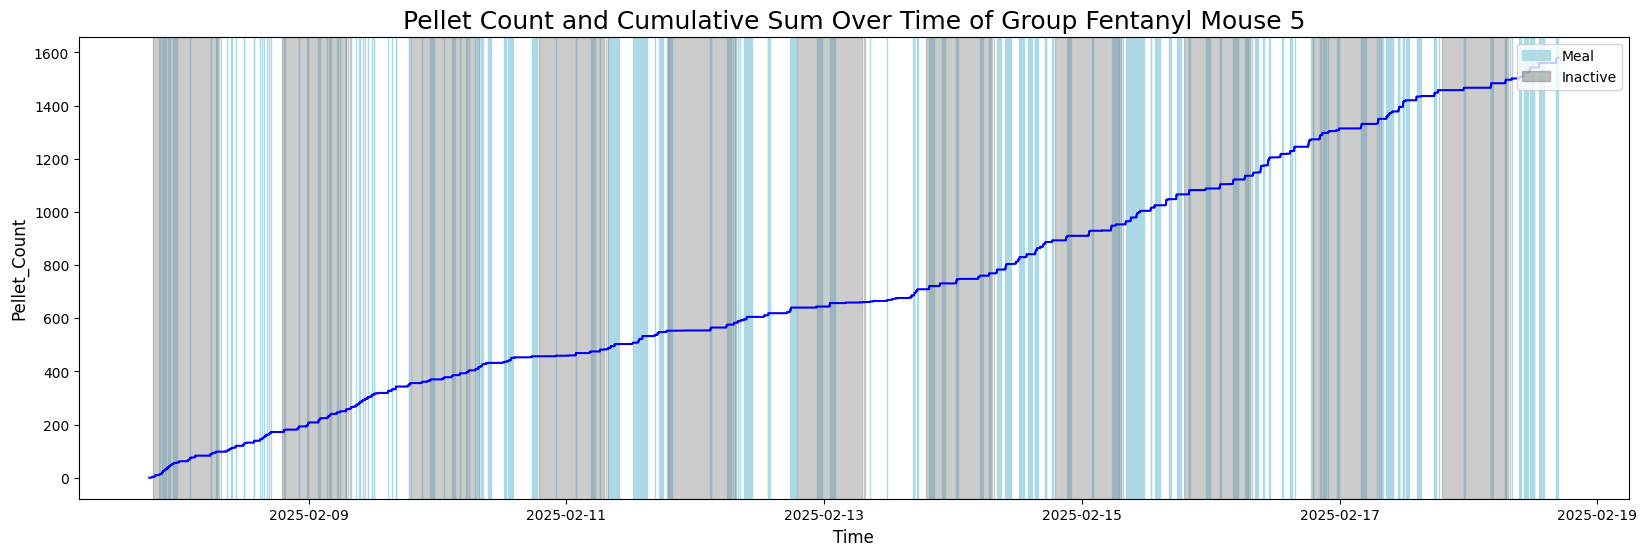

M3_fen.CSV


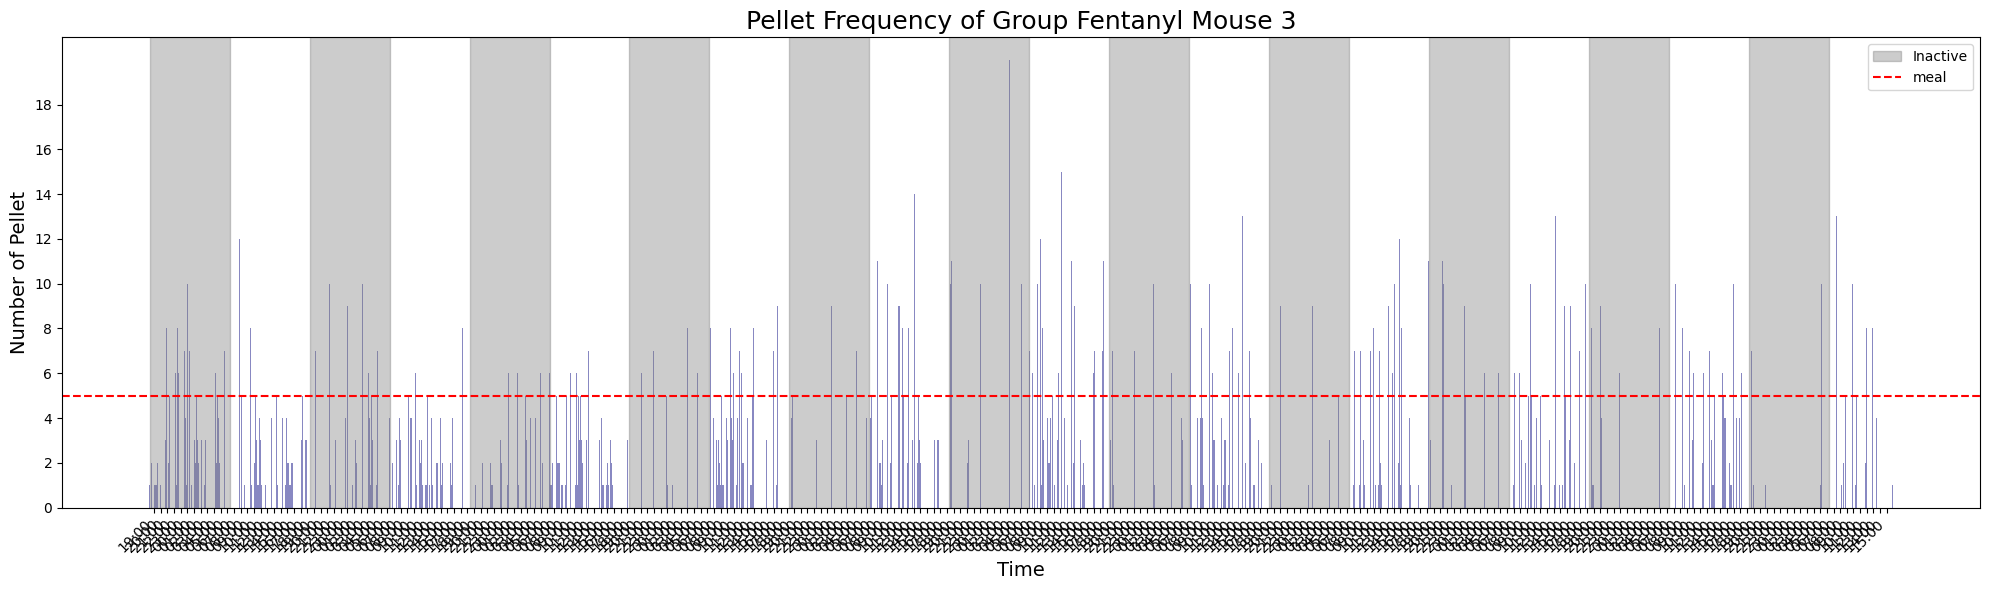

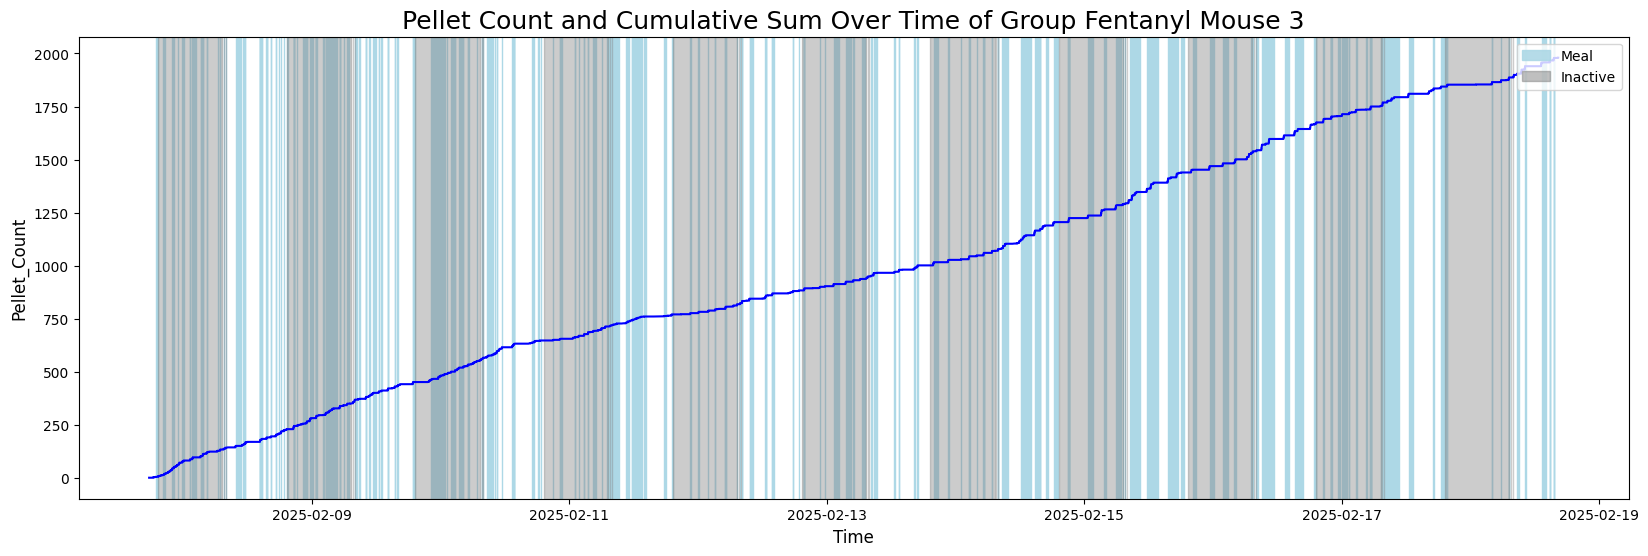

M6_sal.CSV
M8_sal.csv
M9_fen.CSV
M4_sal.CSV
M7_fen.CSV


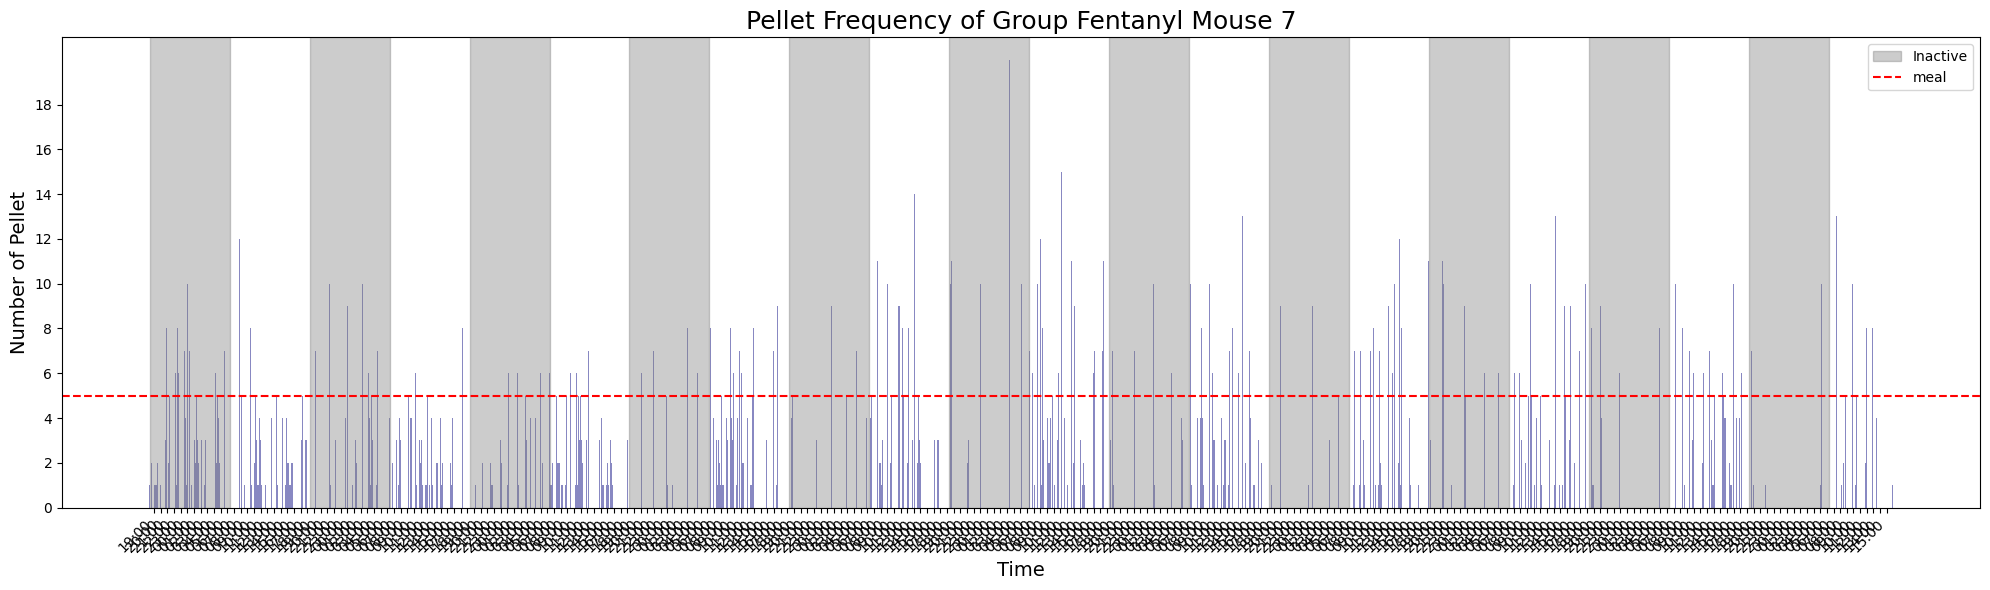

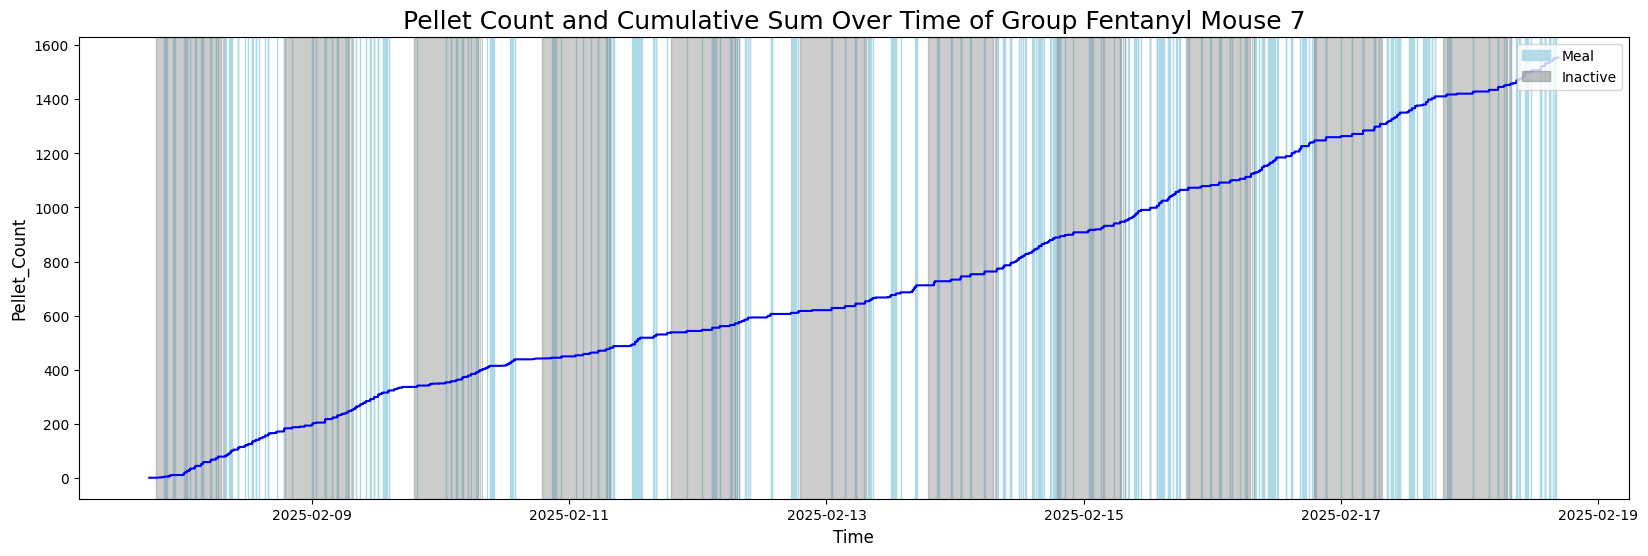

M10_sal.CSV
M1_fen.CSV


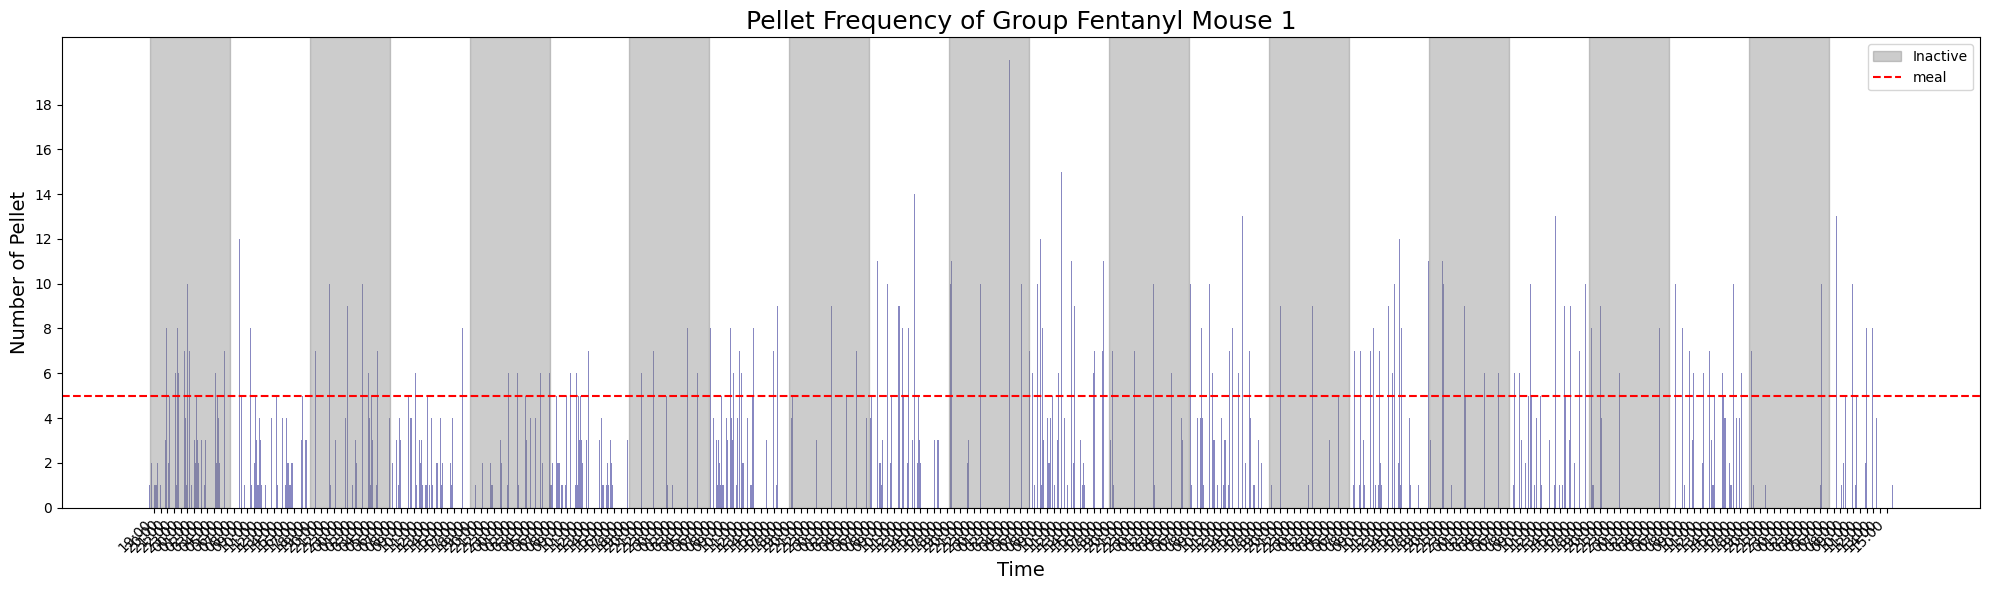

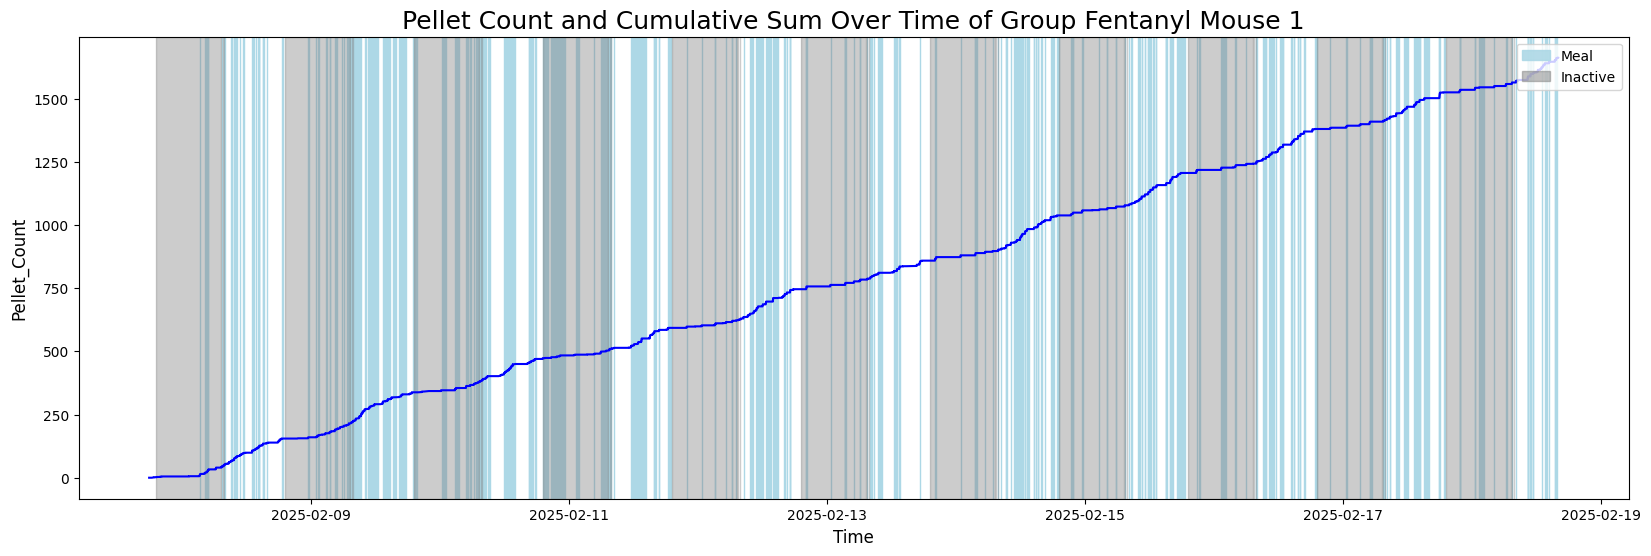

M2_sal.CSV


In [3]:
fent_pellet = [] # pellet per hour
fent_dark_meals = [] # percentage of meals in inactive/dark phase
fent_fir_meal = []
fent_fir_good_meal = []
flip_fent_meal_count = []

for file in os.listdir('../Food Intake Data/'):
    print(file)
    if 'fen' not in file: continue
    try:
        data = preprocess_csv(os.path.join('../Food Intake Data/', file))
    except Exception as e:
        print(f'Error when reading {file}: {e}')        
        continue
    if len(data) < 100: continue
    fent_pellet.append(ml.get_daily_pellet_counts(data))
    bhv, num = 'Fentanyl', file.split('_')[0][1:]
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    fent_fir_meal.append(meal_1)
    fent_fir_good_meal.append(meal_1_good)
    flip_fent_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    fent_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num, )
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, )

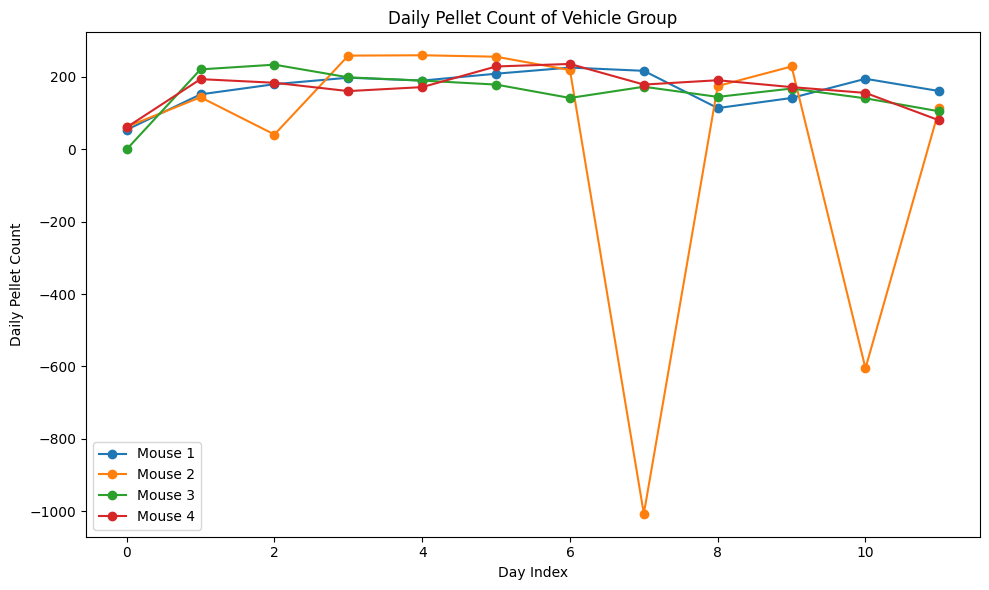

In [4]:
ml.plot_daily_pellet_counts(veh_pellet, 'Vehicle')

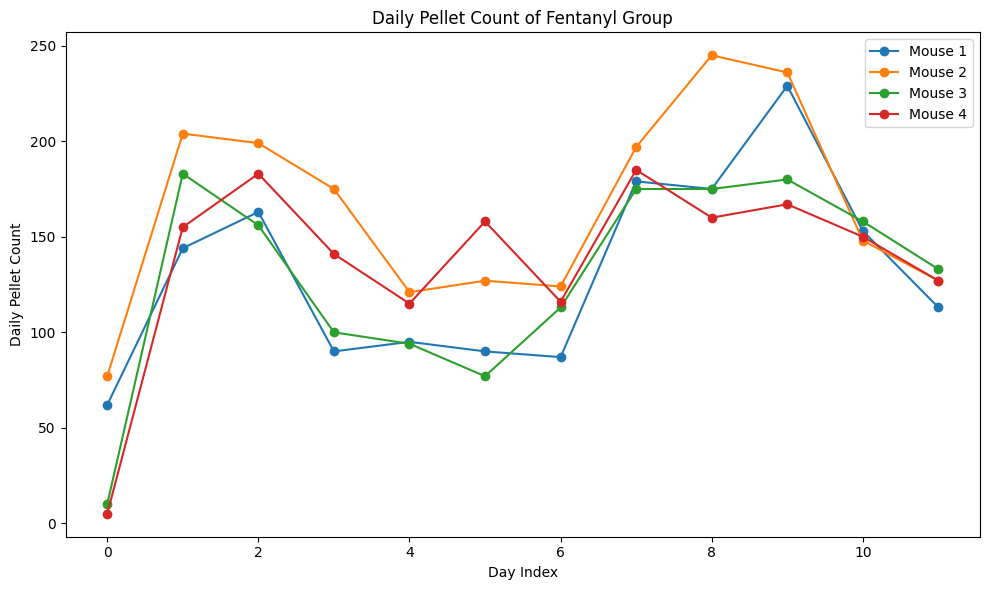

In [5]:
ml.plot_daily_pellet_counts(fent_pellet, 'Fentanyl')

#### Average Meal Count per Day

In [8]:
invs.perform_T_test(flip_veh_meal_count, flip_fent_meal_count, test_side='two-sided')

P Value is  0.06493311526602588
There is no significant difference between the two groups.


In [10]:
flip_veh_meal_count, flip_fent_meal_count

([30.89, 36.6, 28.13, 33.91], [21.13, 28.31, 30.04, 26.0])

### Average Pellet

veh Size: 4
fent Size: 4
veh Average: 224.365
fent Average: 184.93
veh Standard Deviation: 35.353504865147386
fent Standard Deviation: 0.0


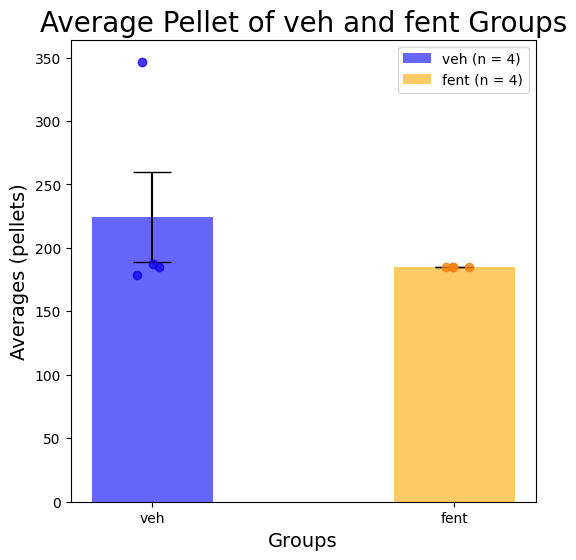

In [7]:
graph_group_stats(veh_pellet, fent_avg_pellet, stats_name='Average Pellet', unit='pellets',
                  group_names=['veh', 'fent'], export_path=os.path.join(export_root, '..', 'average_pellets.svg'))

In [9]:
invs.perform_T_test(veh_avg_pellet, fent_avg_pellet, test_side='two-sided')

P Value is  0.37134714927121
There is no significant difference between the two groups.
